# Regression - Exploration Exercises

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.color_palette("crest")
pal = sns.set_palette('crest')

# import models
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.feature_selection as feat_select
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, normalize

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import custom functions
import acquire
import prepare
import explore
import wrangle

In [2]:
df = acquire.get_telco_data()

In [3]:
df.total_charges = df.total_charges.fillna(value=0)

In [4]:
df = prepare.prep_telco_raw(df)

In [5]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,automatic_pmt
0,2794-XIMMO,Male,0,Yes,No,53,No,No phone service,1,No,...,2,Yes,1,60.45,3184.25,Yes,One year,DSL,Electronic check,0
1,2851-STERV,Male,1,No,No,35,Yes,No,1,No,...,2,Yes,1,73.00,2471.25,No,One year,DSL,Electronic check,0
2,2898-LSJGD,Female,0,Yes,Yes,21,No,No phone service,1,Yes,...,2,Yes,1,55.95,1157.05,Yes,One year,DSL,Electronic check,0
3,2969-WGHQO,Female,0,Yes,Yes,7,Yes,No,1,Yes,...,2,No,1,69.45,477.05,No,One year,DSL,Electronic check,0
4,2988-PLAHS,Female,0,No,No,3,Yes,No,1,No,...,2,Yes,1,69.95,220.45,No,One year,DSL,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9178-JHUVJ,Male,0,Yes,Yes,24,Yes,Yes,3,No internet service,...,3,Yes,3,24.10,587.4,No,Two year,None,Bank transfer (automatic),1
7039,9257-AZMTZ,Female,0,Yes,Yes,52,Yes,No,3,No internet service,...,3,No,3,20.10,1078.75,No,Two year,None,Bank transfer (automatic),1
7040,9537-JALFH,Male,0,Yes,Yes,69,Yes,No,3,No internet service,...,3,No,3,19.90,1356.7,No,Two year,None,Bank transfer (automatic),1
7041,9574-BOSMD,Male,0,Yes,Yes,68,Yes,Yes,3,No internet service,...,3,No,3,25.40,1620.2,No,Two year,None,Bank transfer (automatic),1


In [6]:
# Split the data to ready for exploration, modeling, and testing
# Using the prepare custom function, take in a DataFrame and return train, validate, and test DataFrames; 
# Stratify on churn

train, validate, test = prepare.split_data(df)

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,automatic_pmt
5652,3454-JFUBC,Male,1,No,No,68,Yes,No,3,No internet service,...,3,Yes,4,20.00,1396,No,Two year,None,Credit card (automatic),1
4453,3727-OWVYD,Male,0,No,No,35,Yes,No,1,Yes,...,2,No,2,61.20,2021.2,No,One year,DSL,Mailed check,0
4945,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,1,Yes,...,3,Yes,4,54.05,2375.2,No,Two year,DSL,Credit card (automatic),1
3252,2305-MRGLV,Male,0,Yes,No,28,Yes,No,2,No,...,1,No,3,76.55,2065.4,No,Month-to-month,Fiber optic,Bank transfer (automatic),1
3651,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,1,Yes,...,1,No,3,51.00,581.7,No,Month-to-month,DSL,Bank transfer (automatic),1


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
sns.set_theme(color_codes=True)

In [9]:
def plot_variable_pairs(df):
    
    sns.pairplot(train.drop(columns=['customer_id']),hue = 'churn',kind = "reg",palette = "magma")

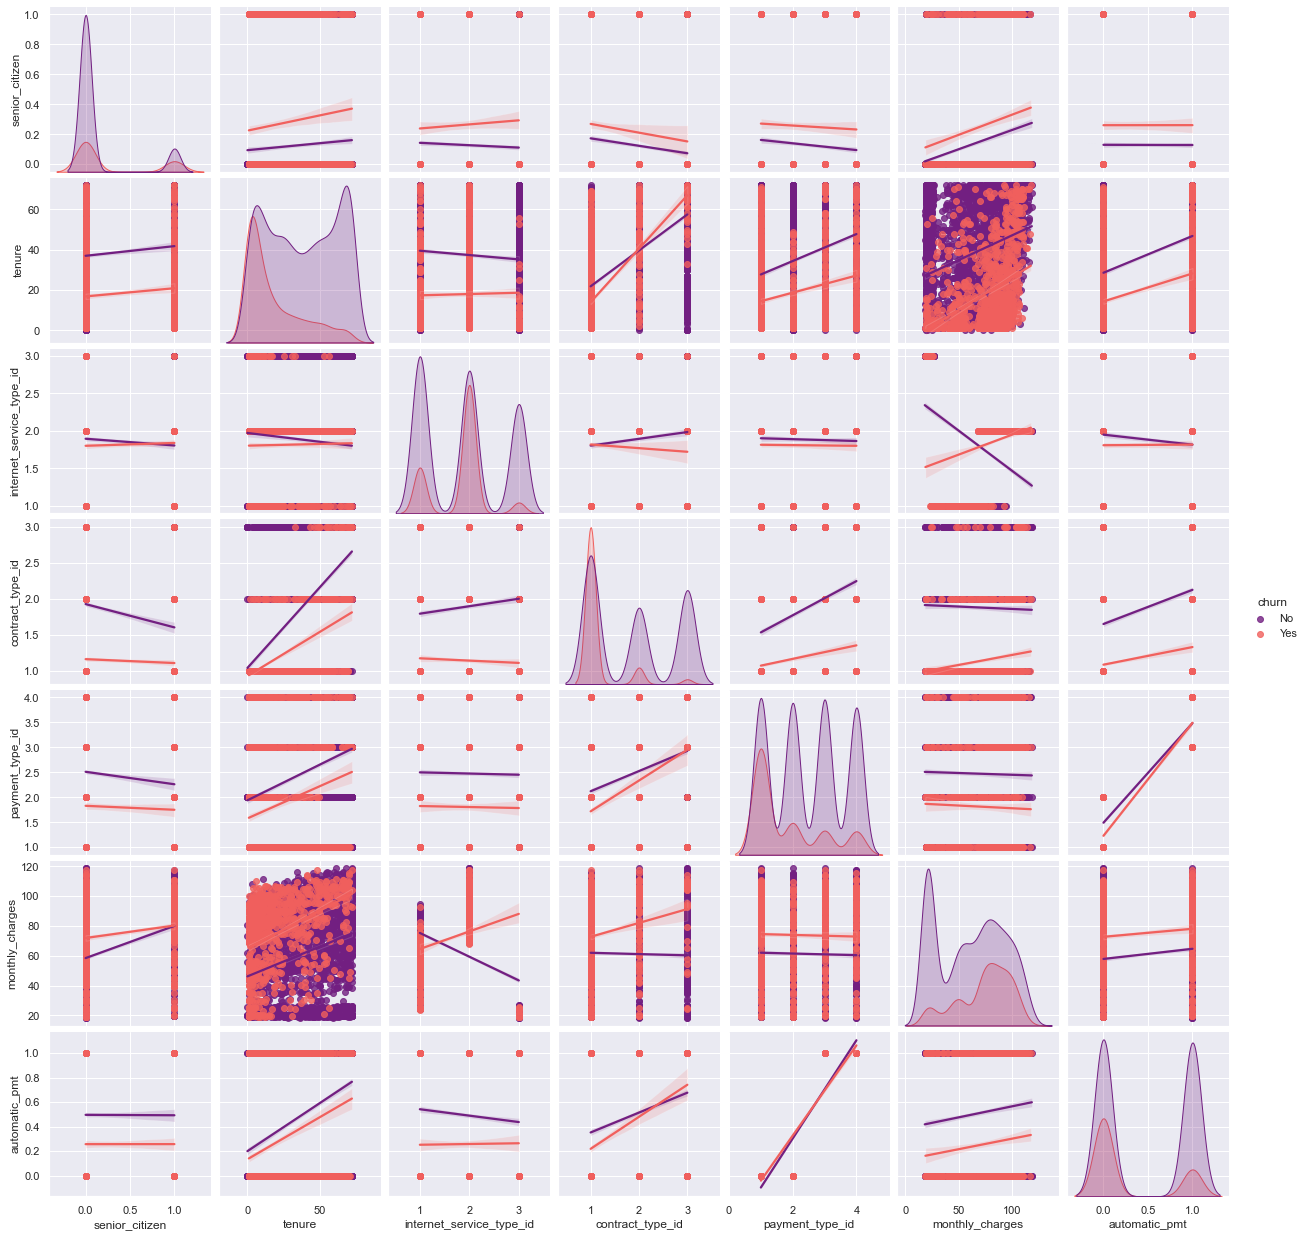

In [10]:
plot_variable_pairs(train)

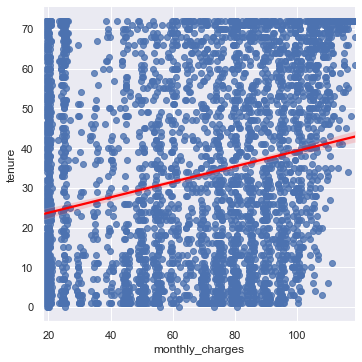

In [11]:
sns.lmplot(x="monthly_charges", y="tenure", data=train, line_kws={'color': 'red'})
plt.show()

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [12]:
def months_to_years(df):
    tenure_years = (df.tenure / 12)
    df['tenure_years'] = tenure_years.round()
    
    return df

In [13]:
months_to_years(train)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,automatic_pmt,tenure_years
5652,3454-JFUBC,Male,1,No,No,68,Yes,No,3,No internet service,...,Yes,4,20.00,1396,No,Two year,None,Credit card (automatic),1,6.0
4453,3727-OWVYD,Male,0,No,No,35,Yes,No,1,Yes,...,No,2,61.20,2021.2,No,One year,DSL,Mailed check,0,3.0
4945,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,1,Yes,...,Yes,4,54.05,2375.2,No,Two year,DSL,Credit card (automatic),1,4.0
3252,2305-MRGLV,Male,0,Yes,No,28,Yes,No,2,No,...,No,3,76.55,2065.4,No,Month-to-month,Fiber optic,Bank transfer (automatic),1,2.0
3651,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,1,Yes,...,No,3,51.00,581.7,No,Month-to-month,DSL,Bank transfer (automatic),1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,7593-XFKDI,Male,0,No,No,1,Yes,No,1,No,...,No,2,46.30,46.3,Yes,Month-to-month,DSL,Mailed check,0,0.0
415,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,2,No,...,Yes,1,108.45,7076.35,No,One year,Fiber optic,Electronic check,0,6.0
1142,5276-KQWHG,Female,1,No,No,2,Yes,No,2,No,...,Yes,1,69.60,131.65,Yes,Month-to-month,Fiber optic,Electronic check,0,0.0
4254,6752-APNJL,Male,0,Yes,Yes,42,Yes,No,1,Yes,...,No,2,54.50,2301.15,No,Month-to-month,DSL,Mailed check,0,4.0


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
telco_cols = ['monthly_charges', 'tenure', 'total_charges']
descriptive = {'monthly_charges': 'Monthly Charges ($)',
               'tenure': 'Tenure (months)',
               'total_charges': 'Total Charges ($)',
               'tenure_years': 'Tenure (years)',
              '':''}

In [ ]:
def plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, df, descriptive=None):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    for categorical_var in categorical_vars:
        for continuous_var in continuous_vars:
            categorical_label = categorical_var
            continuous_label = continuous_var

            if descriptive:
                categorical_label = descriptive[categorical_var]
                continuous_label = descriptive[continuous_var]
                
            fig, axes = plt.subplots(figsize=(12,36), nrows=4,ncols=1)
            fig.suptitle(f'{continuous_label} by {categorical_label}', fontsize=18, y=1.02)

            sns.lineplot(ax=axes[0], x=categorical_var, y=continuous_var, data=df)
            axes[0].set_title('Line Plot', fontsize=14)
            axes[0].set_xlabel(categorical_label, fontsize=12)
            axes[0].set_ylabel(continuous_label, fontsize=12)
            
            sns.boxplot(ax=axes[1], x=categorical_var, y=continuous_var, data=df,\
                        color='blue')
            axes[1].set_title('Box-and-Whiskers Plot', fontsize=14)
            axes[1].set_xlabel(categorical_label, fontsize=12)
            axes[1].set_ylabel(continuous_label, fontsize=12)
            
            sns.swarmplot(ax=axes[2], x=categorical_var, y=continuous_var, data=df,\
                        palette='Blues')
            axes[2].set_title('Swarm Plot', fontsize=14)
            axes[2].set_xlabel(categorical_label, fontsize=12)
            axes[2].set_ylabel(continuous_label, fontsize=12)
            
            sns.barplot(ax=axes[3], x=categorical_var, y=continuous_var, data=df,\
                        palette='Purples')
            axes[3].set_title('Bar Plot', fontsize=14)
            axes[3].set_xlabel(categorical_label, fontsize=12)
            axes[3].set_ylabel(continuous_label, fontsize=12)
            
            plt.tight_layout()

            plt.show()

In [ ]:
plot_categorical_and_continuous_vars(['tenure_years'], \
                    train.drop(columns=['customer_id', 'tenure_years', 'tenure']).columns,\
                    train, descriptive)

In [56]:
def plot_categorical_and_continuous_vars(df, cont_vars, cat_vars):
    
    def plot_swarm(train, churn, cont_var):
        average = train[cont_var].mean()
        p = sns.swarmplot(data=train, x='churn', y=cont_var, color='lightgray')
        p = plt.title(cont_var)
        p = plt.axhline(average, ls='--', color='black')
        return p
    
    def plot_cat_by_target(train, target, cat_var):
        p = plt.figure(figsize=(2,2))
        p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
        #overall_rate = train['churn'].mean()
        #p = plt.axhline(overall_rate, ls='--', color='gray')
        return p
    
    def catplot(train):
        sns.catplot(x="payment_type", y="tenure", hue="churn", aspect=2,
            kind="swarm", data=train, palette = 'magma')
        plt.show()
        
      
    def barplot(train):
        g = sns.catplot(x="payment_type", y="monthly_charges", hue="churn", kind="bar", data=train)
        g.set_xticklabels(rotation=30)
    
    
    def distplot(train):
        sns.distplot(train.monthly_charges)
        
    plot_swarm(df, cont_vars, cat_vars)
    
    plot_cat_by_target(df, 'churn', cat_vars)
    
    catplot(train)
    
    barplot(train)
    

    
    
    
    

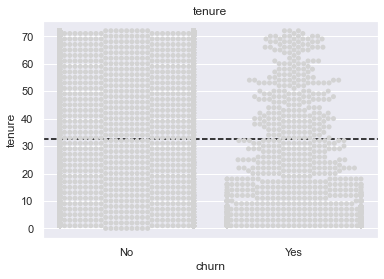

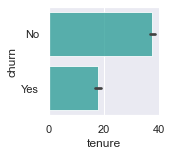

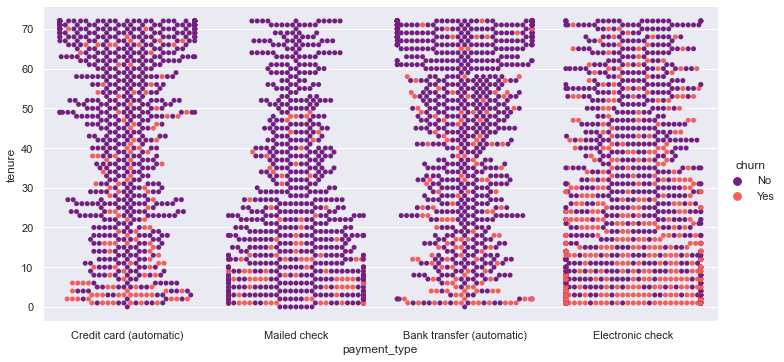

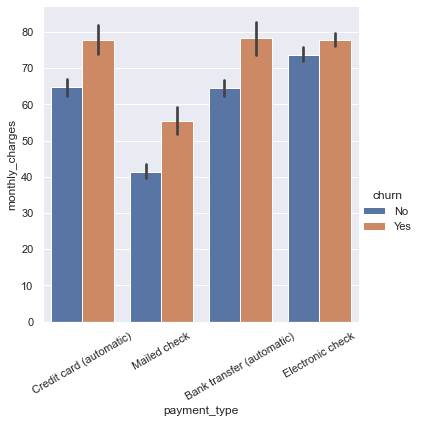

In [57]:
plot_categorical_and_continuous_vars(train, 'monthly_charges', 'tenure')

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

***

# Exercises II - Challenge

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


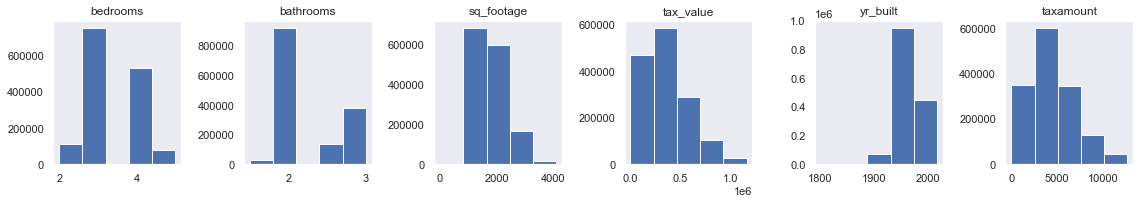

In [58]:
df_zillow = wrangle.wrangle_zillow()

In [59]:
df_zillow.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0


In [60]:
df_zillow.shape

(1475147, 7)

In [90]:
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475147 entries, 4 to 2152861
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1475147 non-null  float64
 1   bathrooms   1475147 non-null  float64
 2   sq_footage  1475147 non-null  float64
 3   tax_value   1475147 non-null  float64
 4   yr_built    1475147 non-null  float64
 5   taxamount   1475147 non-null  float64
 6   fips        1475147 non-null  float64
dtypes: float64(7)
memory usage: 90.0 MB


In [61]:
train, validate, test = wrangle.split_data(df_zillow)
train.shape, validate.shape, test.shape

((826081, 7), (354036, 7), (295030, 7))

In [ ]:
sns.pairplot(train,diag_kind = "kde",kind = "reg",palette = "husl")

In [62]:
cat_vars = ['bedrooms', 'bathrooms', 'fips', 'yr_built']
cont_vars = ['sq_footage', 'tax_value','taxamount']

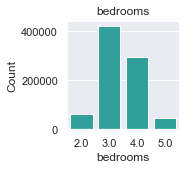

     bedrooms   Count  Percent
3.0       3.0  422782    51.18
4.0       4.0  296663    35.91
2.0       2.0   61438     7.44
5.0       5.0   45198     5.47
_________________________________________________________________


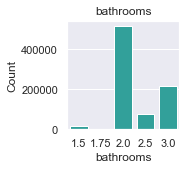

      bathrooms   Count  Percent
2.00       2.00  516661    62.54
3.00       3.00  214885    26.01
2.50       2.50   77366     9.37
1.50       1.50   17167     2.08
1.75       1.75       2     0.00
_________________________________________________________________


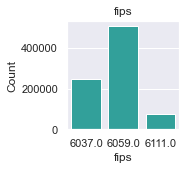

          fips   Count  Percent
6037.0  6059.0  508217    61.52
6059.0  6037.0  244517    29.60
6111.0  6111.0   73347     8.88
_________________________________________________________________


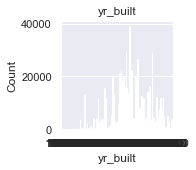

        yr_built  Count  Percent
1955.0    1962.0  39198     4.75
1956.0    1957.0  29372     3.56
1954.0    1990.0  29217     3.54
1964.0    1972.0  26542     3.21
1953.0    1951.0  22489     2.72
...          ...    ...      ...
1865.0    1880.0      2     0.00
1870.0    1883.0      2     0.00
1878.0    1870.0      1     0.00
1874.0    1874.0      1     0.00
1882.0    1878.0      1     0.00

[141 rows x 3 columns]
_________________________________________________________________


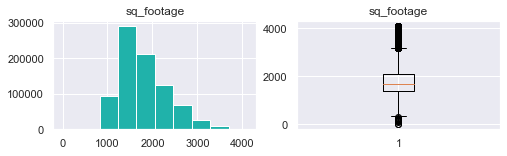

count    826081.000000
mean       1802.605596
std         534.925896
min           3.000000
25%        1397.000000
50%        1687.000000
75%        2114.000000
max        4106.000000
Name: sq_footage, dtype: float64


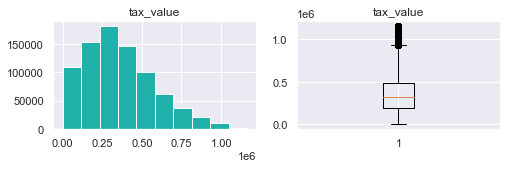

count    8.260810e+05
mean     3.638459e+05
std      2.200606e+05
min      2.200000e+01
25%      1.971980e+05
50%      3.280100e+05
75%      4.930780e+05
max      1.164410e+06
Name: tax_value, dtype: float64


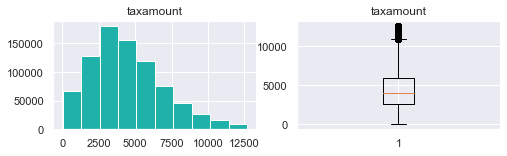

count    826081.000000
mean       4478.857223
std        2499.269704
min          16.480000
25%        2634.670000
50%        4087.380000
75%        5941.890000
max       12686.520000
Name: taxamount, dtype: float64


In [63]:
explore_univariate(train, cat_vars, cont_vars)

bathrooms 
_____________________

            chi2  p-value  degrees of freedom
0  131473.601585      0.0                  12

observed:
 bedrooms     2.0     3.0     4.0    5.0     All
bathrooms                                      
1.5         3510   11137    2407    113   17167
1.75           1       0       1      0       2
2.0        50460  315164  141248   9789  516661
2.5         3056   34115   36620   3575   77366
3.0         4411   62366  116387  31721  214885
All        61438  422782  296663  45198  826081

expected:
               0              1              2             3
0   1276.758751    8785.940597    6165.029484    939.271168
1      0.148746       1.023585       0.718242      0.109428
2  38425.552117  264423.187196  185543.793215  28268.467472
3   5753.930072   39595.332918   27783.752027   4232.984983
4  15981.610314  109976.515705   77169.707032  11757.166949


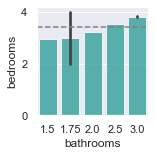


_____________________

fips 
_____________________

         chi2  p-value  degrees of freedom
0  9921.64076      0.0                   6

observed:
 bedrooms    2.0     3.0     4.0    5.0     All
fips                                          
6037.0    41679  276202  165075  25261  508217
6059.0    17034  114269   98343  14871  244517
6111.0     2725   32311   33245   5066   73347
All       61438  422782  296663  45198  826081

expected:
               0              1              2             3
0  37797.547754  260101.611941  182511.375847  27806.464458
1  18185.426666  125141.948906   87811.179256  13378.445172
2   5455.025580   37538.439153   26340.444897   4013.090370


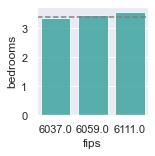


_____________________

yr_built 
_____________________

            chi2  p-value  degrees of freedom
0  100144.132019      0.0                 420

observed:
 bedrooms    2.0     3.0     4.0    5.0     All
yr_built                                      
1865.0        0       1       1      0       2
1870.0        2       0       0      0       2
1874.0        0       0       1      0       1
1875.0        0       2       1      0       3
1878.0        0       1       0      0       1
...         ...     ...     ...    ...     ...
2013.0       59     396     409     61     925
2014.0      121     352     484     30     987
2015.0       38     228     389     50     705
2016.0        0       9      13      3      25
All       61438  422782  296663  45198  826081

[142 rows x 5 columns]

expected:
              0           1           2          3
0     0.148746    1.023585    0.718242   0.109428
1     0.148746    1.023585    0.718242   0.109428
2     0.074373    0.511792    0.359121   0

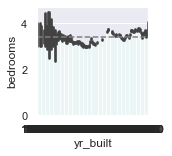


_____________________

sq_footage 
____________________



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbcea4f68b0> (for post_execute):


KeyboardInterrupt: 

In [64]:
cont_vars = ['sq_footage','taxamount','tax_value']
cat_vars = ['bathrooms', 'fips', 'yr_built']
explore_bivariate(train, 'bedrooms', cat_vars, cont_vars)

In [ ]:
target = 'bedrooms'

explore.explore_multivariate(train, target, cat_vars, cont_vars)

In [66]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_footage', 'tax_value', 'yr_built',
       'taxamount', 'fips'],
      dtype='object')

In [74]:
# Create a smaller dataframe for visualizing
small_train = train[['bedrooms', 'bathrooms', 'sq_footage', 'tax_value', 'yr_built',
       'taxamount', 'fips']]

small_train = small_train.head(5000)

print("Smaller DataFrame:")
small_train.shape

small_train.head()

Smaller DataFrame:


,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
278237,3.0,2.0,1644.0,405574.0,1962.0,4833.68,6059.0
245132,3.0,2.0,1312.0,366057.0,1957.0,4372.48,6059.0
1369940,3.0,3.0,1524.0,177000.0,1990.0,3295.43,6037.0
1533627,3.0,2.0,1696.0,681822.0,1962.0,7983.41,6037.0
181419,3.0,2.0,1092.0,251452.0,1972.0,3285.26,6059.0


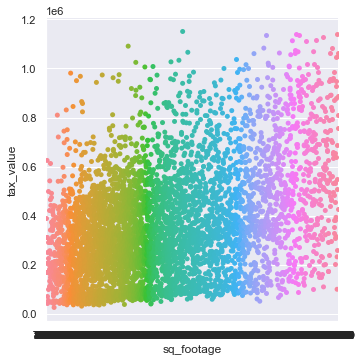

In [75]:
sns.catplot(x="sq_footage", y="tax_value", data=small_train)

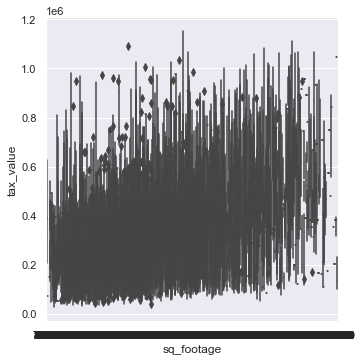

In [76]:
sns.catplot(x="sq_footage", y="tax_value", kind="box", data=small_train)

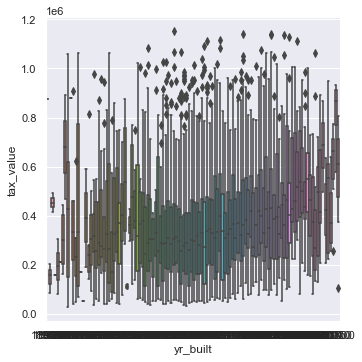

In [77]:
sns.catplot(x="yr_built", y="tax_value", kind="box", data=small_train)

<AxesSubplot:>

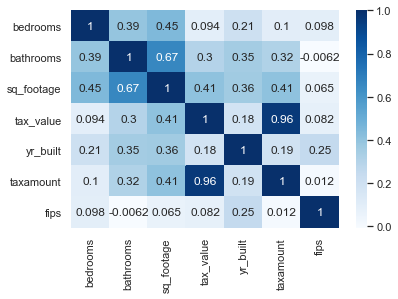

In [78]:
correlation_table = small_train.corr()
# sns.heatmap(correlation_table, cmap='Blues', annot=True, vmin=0, vmax=1)
sns.heatmap(correlation_table, cmap='Blues', annot=True)

In [79]:
train.bedrooms.value_counts()

3.0    422782
4.0    296663
2.0     61438
5.0     45198
Name: bedrooms, dtype: int64

In [80]:
train.bathrooms.value_counts()

2.00    516661
3.00    214885
2.50     77366
1.50     17167
1.75         2
Name: bathrooms, dtype: int64

In [81]:
train.sq_footage.value_counts().value_counts()

1       143
3       103
2       100
4        74
6        60
       ... 
420       1
806       1
489       1
572       1
1927      1
Name: sq_footage, Length: 835, dtype: int64

In [82]:
train.sq_footage.min(), train.sq_footage.max(), train.sq_footage.mean()

(3.0, 4106.0, 1802.6055955771892)

In [83]:
train.tax_value.min(), train.tax_value.max(), train.tax_value.mean()

(22.0, 1164410.0, 363845.89304075507)

In [84]:
train.yr_built.min(), train.yr_built.max(), train.yr_built.mean()

(1865.0, 2016.0, 1964.2889486624192)

In [86]:
train.sq_footage.value_counts(bins=[0, 1000, 2000,3000,4000,5000])

(1000.0, 2000.0]    567710
(2000.0, 3000.0]    224793
(3000.0, 4000.0]     25826
(-0.001, 1000.0]      7462
(4000.0, 5000.0]       290
Name: sq_footage, dtype: int64

In [ ]:
train['sq_footage_desc'] = np.where(train.sq_footage > 3090, 'largest','large')

In [87]:
train.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
278237,3.0,2.0,1644.0,405574.0,1962.0,4833.68,6059.0
245132,3.0,2.0,1312.0,366057.0,1957.0,4372.48,6059.0
1369940,3.0,3.0,1524.0,177000.0,1990.0,3295.43,6037.0
1533627,3.0,2.0,1696.0,681822.0,1962.0,7983.41,6037.0
181419,3.0,2.0,1092.0,251452.0,1972.0,3285.26,6059.0


In [93]:
train.tax_value.value_counts(bins=[0, 100000, 200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000])

(200000.0, 300000.0]      160040
(300000.0, 400000.0]      141616
(100000.0, 200000.0]      122714
(400000.0, 500000.0]      113975
(-0.001, 100000.0]         87758
(500000.0, 600000.0]       76731
(600000.0, 700000.0]       51285
(700000.0, 800000.0]       33315
(800000.0, 900000.0]       20218
(900000.0, 1000000.0]      11759
(1000000.0, 1100000.0]      5686
(1100000.0, 1200000.0]       984
Name: tax_value, dtype: int64

In [94]:
train.tax_value.max()

1164410.0

In [95]:
train.tax_value.mean()

363845.89304075507

In [96]:
train.tax_value.median()

328010.0

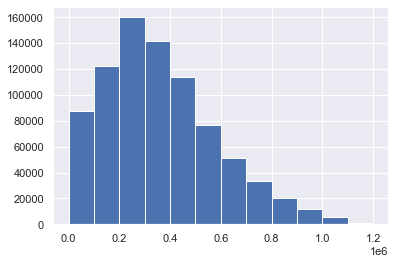

In [97]:
bins_list = [0, 100000, 200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000]
ax = plt.hist(train.tax_value, bins = bins_list)

(array([ 61438.,      0.,      0., 422782.,      0.,      0., 296663.,
             0.,      0.,  45198.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

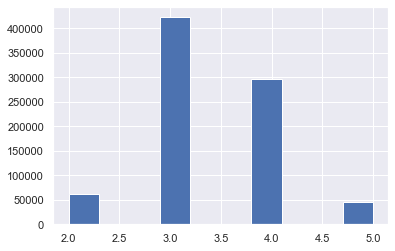

In [98]:
plt.hist(train.bedrooms)

(array([508217.,      0., 244517.,      0.,      0.,      0.,      0.,
             0.,      0.,  73347.]),
 array([6037. , 6044.4, 6051.8, 6059.2, 6066.6, 6074. , 6081.4, 6088.8,
        6096.2, 6103.6, 6111. ]),
 <BarContainer object of 10 artists>)

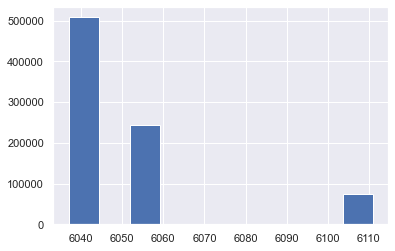

In [99]:
plt.hist(train.fips)

Text(0.5, 1.0, 'Price vs Square Feet')

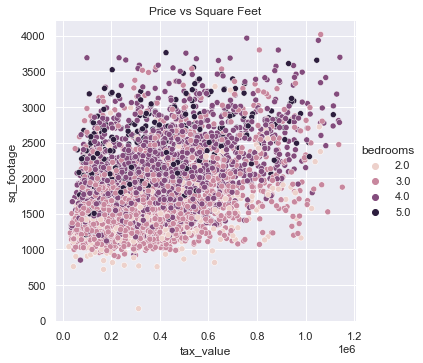

In [109]:
sns.relplot(x="tax_value", y="sq_footage", hue="bedrooms", data=small_train);
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Footage')

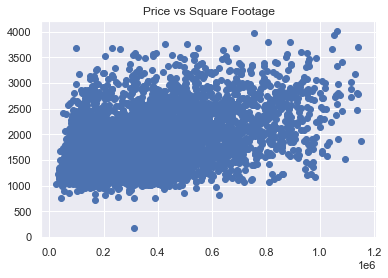

In [111]:
plt.scatter(small_train.tax_value, small_train.sq_footage)
plt.title("Price vs Square Footage")

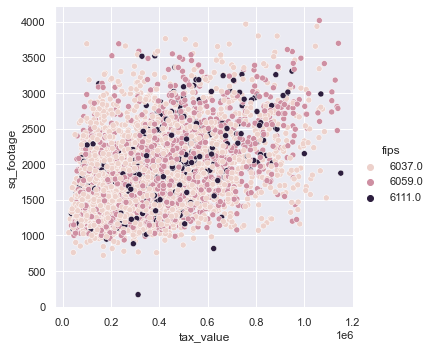

In [104]:
sns.relplot(x="tax_value", y="sq_footage", hue="fips", data=small_train);

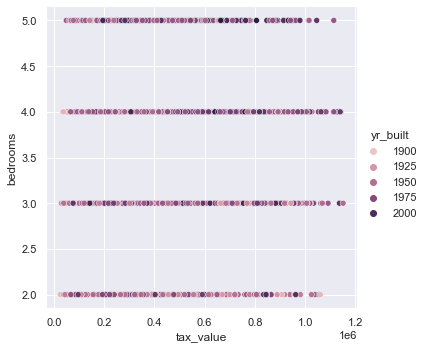

In [106]:
sns.relplot(x="tax_value", y="bedrooms", hue="yr_built", data=small_train);

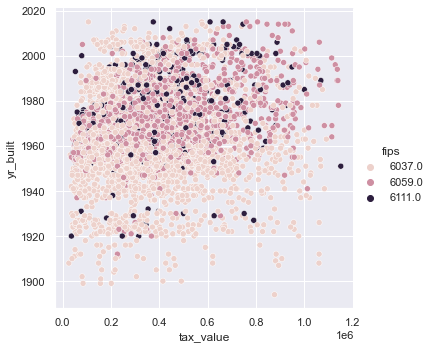

In [107]:
sns.relplot(x="tax_value", y="yr_built", hue="fips", data=small_train);

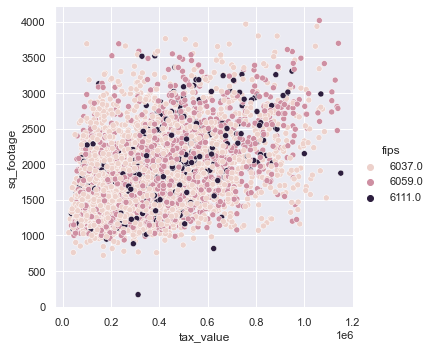

In [113]:
sns.relplot(x="tax_value", y="sq_footage", hue="fips", data=small_train);

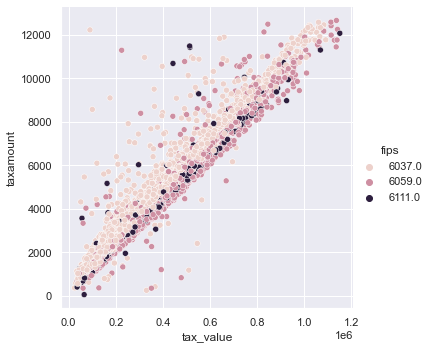

In [112]:
sns.relplot(x="tax_value", y="taxamount", hue="fips", data=small_train);

<function matplotlib.pyplot.show(close=None, block=None)>

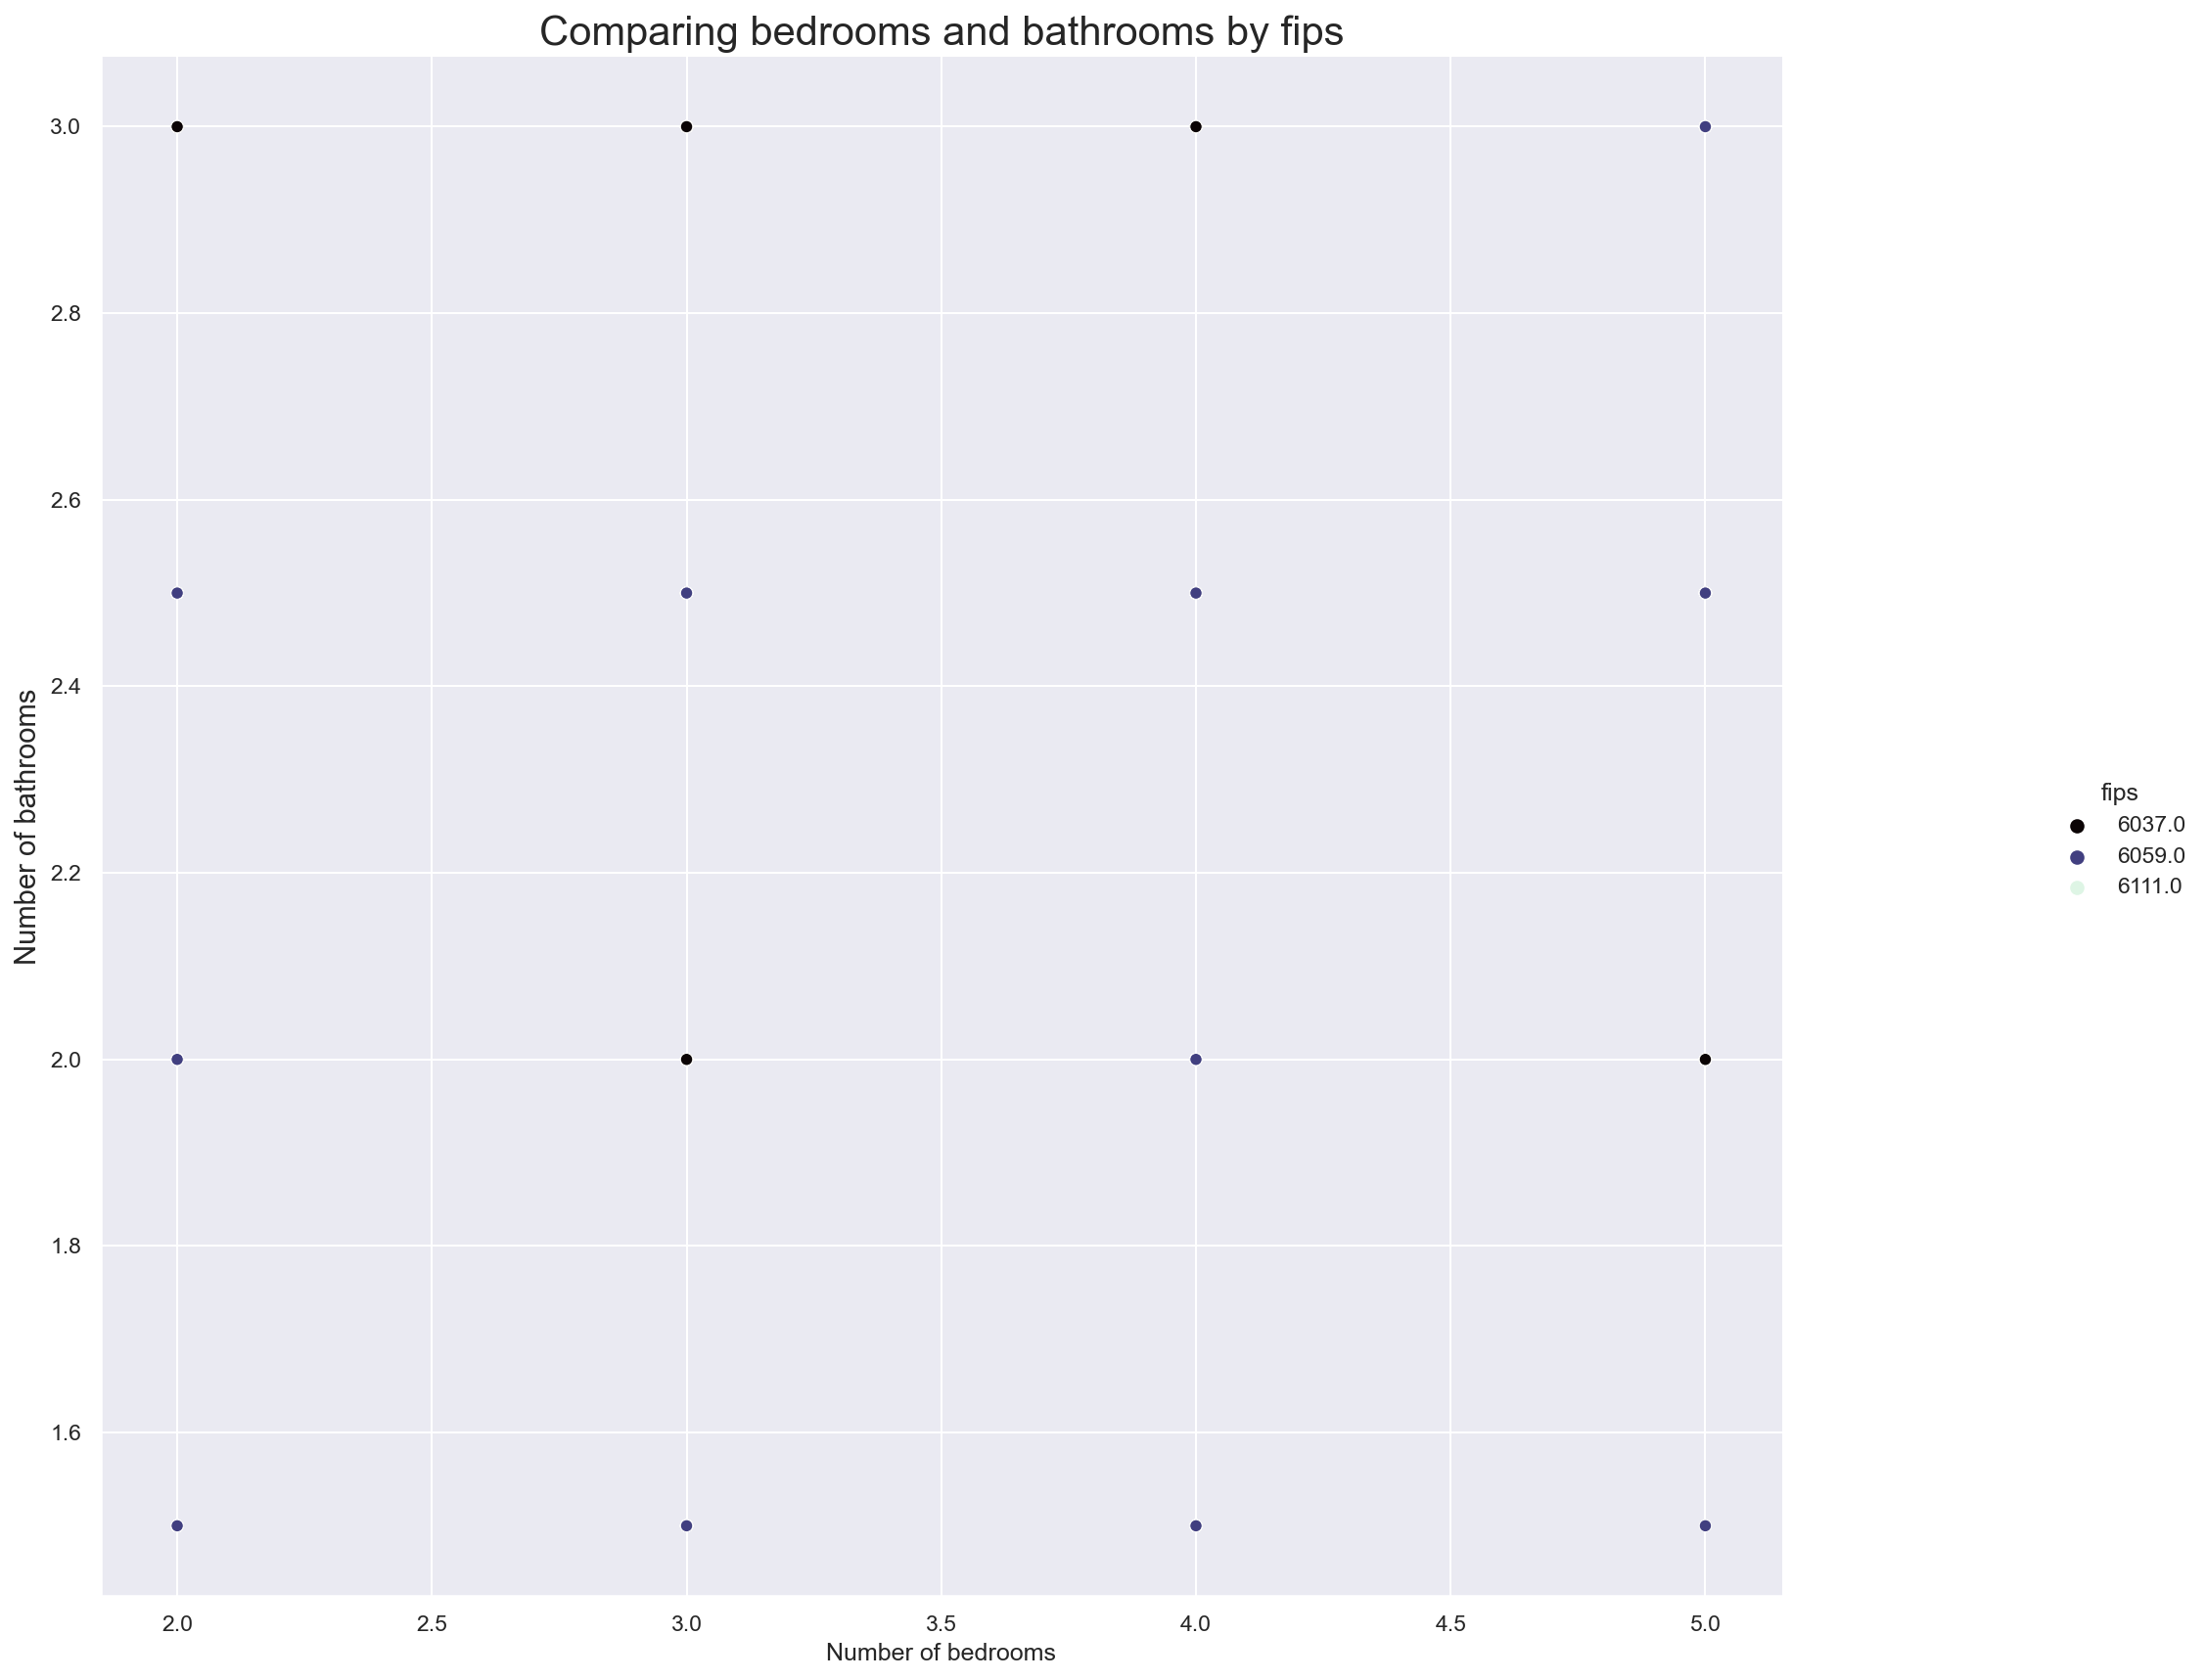

In [137]:
plot = sns.relplot(x="bedrooms", y="bathrooms", hue="fips", data=small_train, palette = 'mako')
plot.fig.set_dpi(150)
plt.title("Comparing bedrooms and bathrooms by fips", fontsize = 20)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of bathrooms", fontsize = 14)
plot.fig.set_size_inches(16,12) 
plt.grid(True, axis = 'both')
plt.show

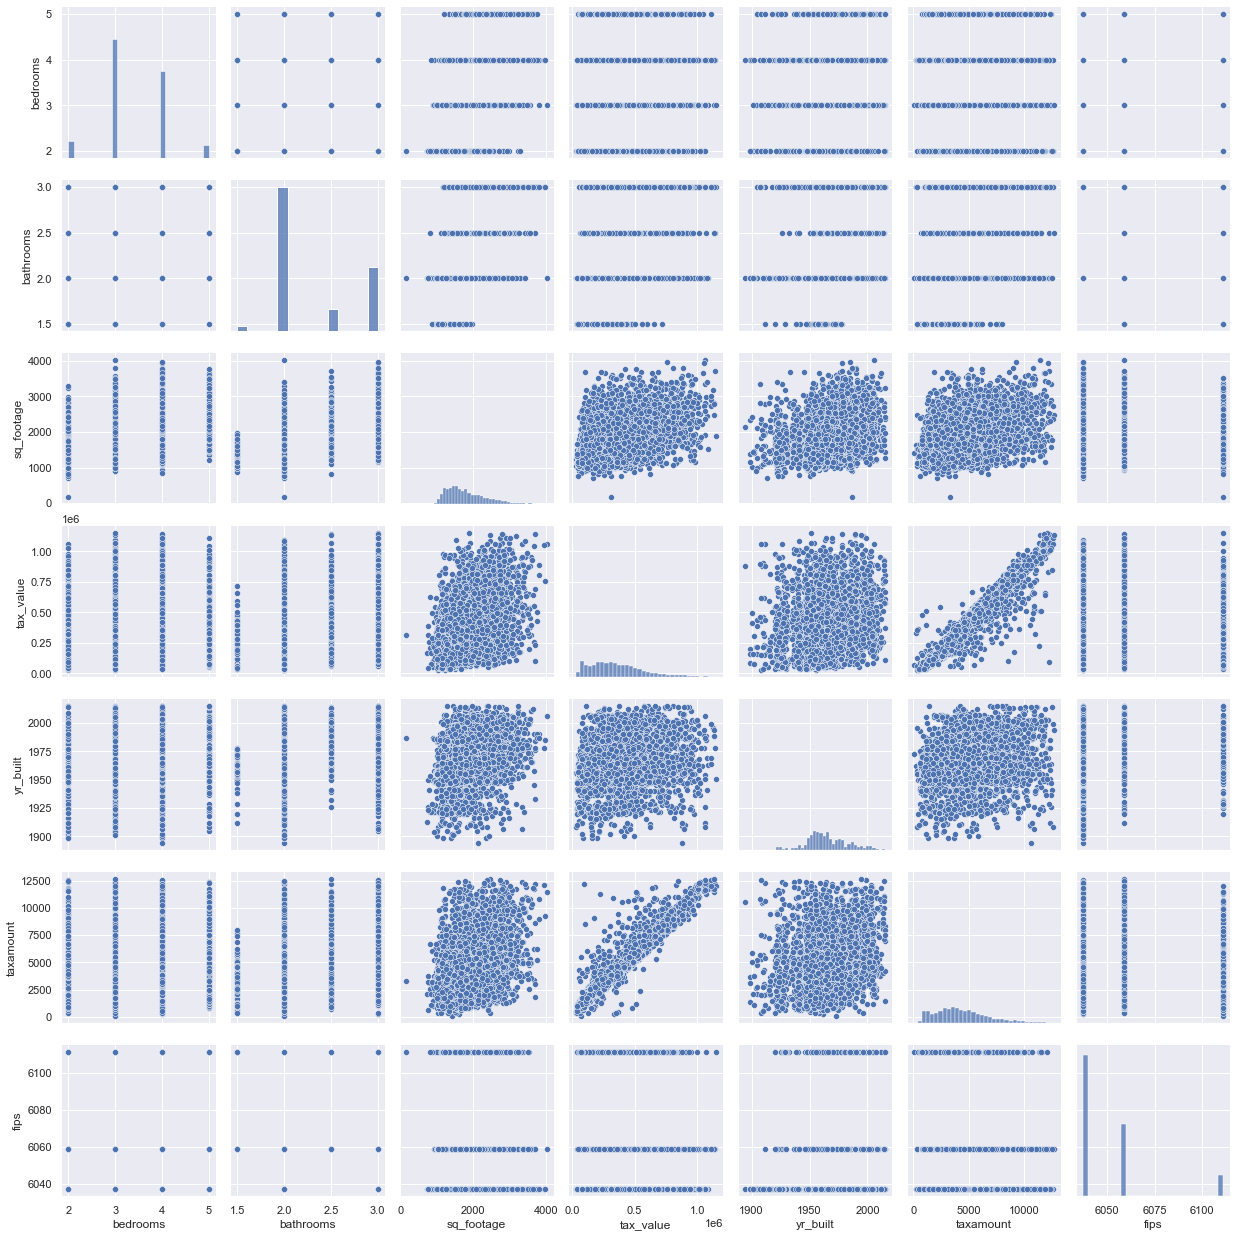

In [115]:
sns.pairplot(small_train)

2. Come up with some initial hypotheses based on your goal of predicting property value.

### Initial Hypotheses: 
    - Property values are dependent on square footage. 
    - Property values are dependent on the year built
    - Property values are dependent on the number of bedrooms
    - Property values are dependent on the area they are located (FIPS)


3. Visualize all combinations of variables in some way.

4. Run the appropriate statistical tests where needed.

5. What independent variables are correlated with the dependent variable, home value?

6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [118]:
#Correlation tests are used to check if two samples are related
r, p = stats.pearsonr(small_train.tax_value, small_train.bedrooms)
r,p

(0.09386664863032791, 2.922935712020668e-11)

In [119]:
r, p = stats.pearsonr(small_train.tax_value, small_train.bathrooms)
r,p

(0.3020552860717894, 5.485811949582921e-106)

In [120]:
r, p = stats.pearsonr(small_train.tax_value, small_train.fips)
r,p

(0.08245867221703389, 5.245317118346374e-09)

In [121]:
r, p = stats.pearsonr(small_train.tax_value, small_train.sq_footage)
r,p

(0.40720852874930713, 4.699159463806777e-199)

In [122]:
r, p = stats.pearsonr(small_train.tax_value, small_train.yr_built)
r,p

(0.18402657484010848, 2.4763986538251645e-39)

In [ ]:
#Getting observed to run Chi^2 test for independence
observed = pd.crosstab(small_train.tax_value, small_train.sq_footage)
observed

In [125]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(4718534509.352634, 0.0)

In [ ]:
observed = pd.crosstab(small_train.tax_value, small_train.sq_footage)
observed

- Takeaways:

     - Bedrooms, bathrooms, square footage, fips, and year built all are correlated to price
     